# Ridge Regression

# required function 

In [1]:
# reading the data
read_data <- function(fname, sc) {
   data <- read.csv(file=fname,head=TRUE,sep=",")
   nr = dim(data)[1]
   nc = dim(data)[2]
   x = data[1:nr,1:(nc-1)]
   y = data[1:nr,nc]
   if (isTRUE(sc)) {
      x = scale(x)
      y = scale(y)
   }
   return (list("x" = x, "y" = y))
}

# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

# auxiliary function to calculate the objective function for the training
train_obj_func <- function (Phi, w, label, lambda){
    # the L2 regulariser is already included in the objective function for training 
    return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}

# auxiliary function to compute the error of the model
get_errors <- function(train_data, test_data, W) {
   n_weights = dim(W)[1]
   errors = matrix(,nrow=n_weights, ncol=2)
   for (tau in 1:n_weights) {
      errors[tau,1] = train_obj_func(train_data$x, W[tau,],train_data$y, 0)
      errors[tau,2] = train_obj_func(test_data$x, W[tau,],test_data$y, 0)
   }
   return(errors)
}

## Gradient descent

In [2]:
# barch gardient descent function
bgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {

   train_len = dim(train_x)[1]

   W <- matrix(,nrow=(max_epoch+1), ncol=ncol(train_x))
   W[1,] <- runif(ncol(train_x))

   tau = 1 # counter 
   obj_func_val <-matrix(,nrow=(max_epoch+1), ncol=1)
   obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)

   trainin_size = dim(train_x)[1]
   for (tau in 1:max_epoch){

       # check termination criteria
       if (obj_func_val[tau,1]<=epsilon) {break}

       # make prediction over the training set
       y_pred = train_x %*% W[tau,]

       # update the weight you may decide to chose linear search or not (we are not using line search here)
       W[tau+1,] = bgd_update_weight(W[tau,], train_x, train_y, y_pred, lambda, eta)

       # keep track of the objective funtion
       obj_func_val[tau+1,1] = train_obj_func(train_x, W[tau+1,],train_y, lambda)
   } 
   # resulting values for the training objective function as well as the weights
   return(list('vals'=obj_func_val,'W'=W))
}

# updating the weight vector
bgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
   # Modified grad descent to fit L2 Norm
   grad = -colMeans(matrix((y_true-y_pred),nrow=dim(x)[1],ncol=dim(x)[2]) * x)
   return (W_prev - eta * (2*grad + 2* lambda* W_prev))
}

## Stochastic gradient descent

In [3]:
# stochastic gradient function 
sgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {
   
    # initialization 
   train_len = dim(train_x)[1]
   tau_max = max_epoch * train_len

   W <- matrix(,nrow=tau_max, ncol=ncol(train_x)) 
   W[1,] <- runif(ncol(train_x))
  
   tau = 1 # counter 
   obj_func_val <-matrix(,nrow=tau_max, ncol=1) 
   obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
   
   # loop to update weigths
   while (tau <= tau_max){

       # check termination criteria
       if (obj_func_val[tau,1]<=epsilon) {break}
 
       # shuffle data:
       train_index <- sample(1:train_len, train_len, replace = FALSE)
    
       # loop over each datapoint
       for (i in train_index) {
           # increment the counter
           tau <- tau + 1
           if (tau > tau_max) {break}

           # make the weight update
           y_pred <- predict_func(train_x[i,], W[tau-1,])
           W[tau,] <- sgd_update_weight(W[tau-1,], train_x[i,], train_y[i], y_pred, lambda, eta)

           # keep track of the objective funtion
           obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
       }
   }
   # resulting values for the training objective function as well as the weights
   return(list('vals'=obj_func_val,'W'=W))
}

# updating the weight vector
sgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
   # modified the function to fit L2 Norm
   grad = - (y_true-y_pred) * x 
   return(W_prev - eta * (2*grad + 2* lambda* W_prev))
}

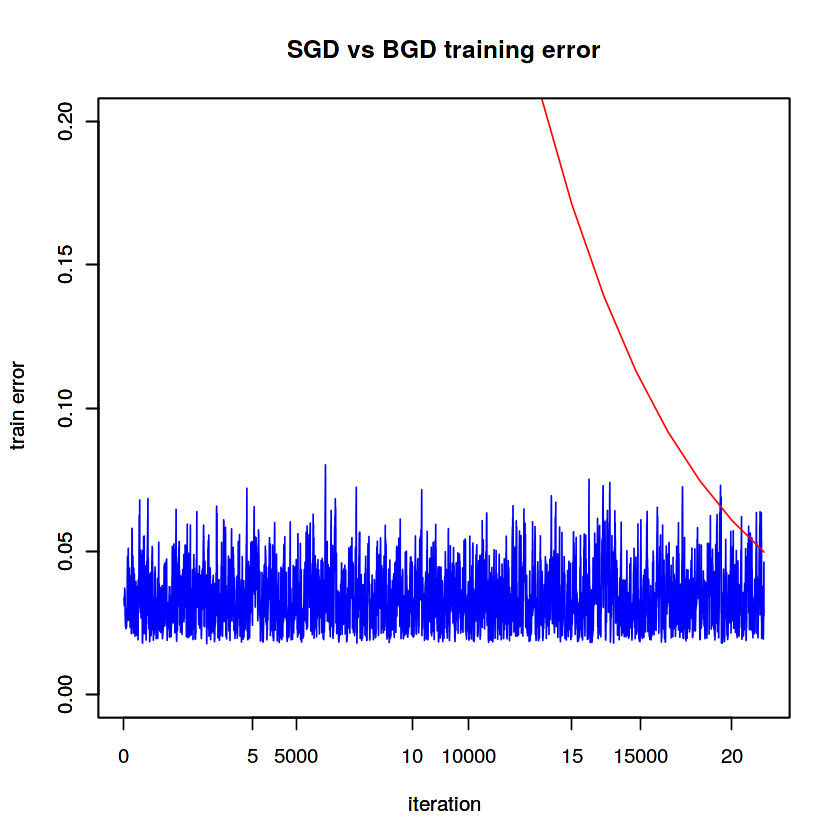

In [4]:
# prevent warning messages
options(warn =-1)

# function to train and get the training errors
play_with_sgd <- function() {
## reading the data
   dtrain = read_data("Task2A_train.csv", TRUE)
   dtest = read_data("Task2A_test.csv", TRUE)
 
   ##### SGD Trainng
   max_epoch = 20
   epsilon = .001
   eta = .01
   lambda=0.5
  
   train_res = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
   errors = get_errors(dtrain, dtest, train_res$W) 
    
   # traning errors after every weigth vector update
   return(errors)
}

play_with_bgd <- function() {
  ## reading the data
   dtrain = read_data("Task2A_train.csv", TRUE)
   dtest = read_data("Task2A_test.csv", TRUE)

   ##### BGD Training
   max_epoch = 20
   epsilon = .001
   eta = .01
   lambda=0.5

   train_res = bgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
   errors = get_errors(dtrain, dtest, train_res$W)
    
   # traning errors after every weigth vector update
   return(errors)
}

# e1 is train error of stochastic gradient
e1 <- play_with_sgd()
# e2 is train error of batch gradient
e2 <- play_with_bgd()

# ploting the training errors in one plot
plot(e1[,1], type="l", col="blue",ylim=c(0,0.2), xlab="iteration", ylab=" train error",main='SGD vs BGD training error')
par(new=TRUE)
plot(e2[,1], type="l", col="red",ylim=c(0,0.2), xlab="iteration", ylab=" train error")

## observation based on the errors plot you generated

From the plot, I can say that convergence speed of stochastic batch gradients is faster. since stochastic gardient takes a random training point in updating the weight while batch gardient decent picks all training data for one single update. The fluctuations in stochatic gradient is because of frequent change in cost function. But, on an average stochatic gradient reaches global minima. 